In [1]:
from client_side.client import client
from server_side.workers import phone_support
from server_side.vm import vm_deliver
from server_side.server import server
from settings.statistic import statistic_collector
from simpy import Environment
import matplotlib.pyplot as plt
import pandas
import numpy as np

time = 300
env = Environment()
client(env, phone_support(env), vm_deliver(env, server(env, "server")))
env.run(until=time)
statistic_collector.save()

In [2]:
for key in statistic_collector.load:
    print(f"{key}: {statistic_collector.load[key]}")

clien_count: 342
client_vms_1: [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0, 1, 2, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 0, 1, 2, 3, 0, 1, 2, 3, 4, 0, 1, 2, 0, 1, 0, 1, 2, 3, 4, 5, 0, 1, 2, 0, 1, 2, 3, 4, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 0, 1, 2, 3, 4, 5, 6]
break_vm: 2655
fixing_devops: 1880
count_fixing_devops: 940
searched: 963
expanded: 341
client_vms_12: [0, 1, 2, 3, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 0, 1, 2, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2]
client_vms_13: [0, 1, 0, 1, 2

In [13]:
df = pandas.DataFrame()
import warnings
warnings.filterwarnings("ignore")
for key in statistic_collector.load:
    if key[:10] == "client_vms":
        if len(statistic_collector.load[key]) == 1 and statistic_collector.load[key][0] == 0:
            continue
        # plt.plot(statistic_collector.load[key])
        x = [np.NaN] * (time // 2 - len(statistic_collector.load[key])) + statistic_collector.load[key]
        df[key] = np.array(x)
        
df['mean'] = df.mean(axis=1)        
df["sum"] = df.sum(axis=1)
df.head()

,client_vms_1,client_vms_12,client_vms_13,client_vms_14,client_vms_135,client_vms_126,client_vms_137,client_vms_128,client_vms_1269,client_vms_1360,...,client_vms_168221,client_vms_1296532,client_vms_1364783,client_vms_131414,client_vms_127825,client_vms_165016,client_vms_1303787,client_vms_206238,mean,sum
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,6.0
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,8.0


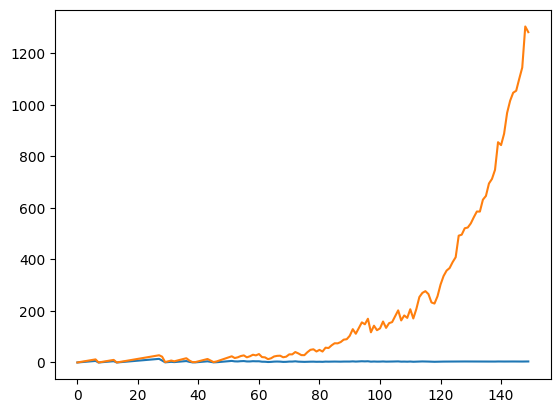

In [14]:
plt.plot(df['mean'])
plt.plot(df['sum'])
